# Pandas Tutorial

### Import Libraries 

In [1]:
from pandas import DataFrame, Series
import pandas as pd
import json

### Open json document

In [2]:
path = "C:\\Users\\mdeleseleuc\\Documents\\usagov_bitly_data2012-03-16-1331923249.txt"
records = [json.loads(line.decode('utf-8')) for line in open(path, 'rb')]

### Create a data frame

In [10]:
frame = DataFrame(records)
frame.info()
frame['tz'][:10] #from first row to 10th row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                      NaN
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                         
29                         
30            Europe/London
31         America/New_York
32         Pacific/Honolulu
33          America/Chicago
34                         
35                         
36         Pacific/Honolulu
37                         
38         America/New_York
39         America/New_York
               ...         
3530    America/Los_Angeles
3531                       
3532       America/New_York
3533       America/New_York
3534        America/

### Counting Time Zone

In [4]:
tz_counts = frame['tz'].value_counts()

#### Count Top 10 Time Zone 

In [15]:
tz_counts[:10] # from first row to 10th row

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

## Select Multiple Columns 

In [81]:
from numpy.random import randn

df = DataFrame(randn(10, 10), index=range(0,10), columns=['A', 'B', 'C', 'D','E','F','G','H','I','J'])

cols = list(df.loc[:,'A':'C']) + ['E'] + list(df.loc[:,'G':'I']) # df.loc[rows, columns]
df[cols]


,A,B,C,E,G,H,I
0,-0.777614,0.139033,-1.760012,0.572500,-0.341855,-0.106608,0.286424
1,1.293244,0.897309,-0.103579,1.634861,-1.772218,-0.883077,0.170219
2,-0.860854,-1.045912,0.016469,-0.650352,-0.419309,-0.135677,0.469322
3,-0.602454,0.048851,-0.470056,1.137770,0.482254,-0.218083,-1.347134
4,-2.245800,-0.651136,-2.433175,1.101322,0.372232,-0.393002,-0.821974
5,-0.093971,-0.121109,0.747415,0.248017,-0.465393,1.552906,0.542958
6,-0.124333,-0.218722,-0.958627,-0.296534,-0.558463,-1.916055,1.379466
7,-0.716517,-0.650701,-1.271580,-1.027166,-1.826040,-0.907562,2.521552
8,1.400185,-1.100460,0.909589,0.174735,0.667386,-0.454072,0.776666
9,-0.279265,0.108401,-1.596890,0.835067,1.231576,-0.020013,0.138867


In [97]:
cols = list(df.ix[:,:2] + df.ix[:,[4]])  #first two columns + 4th colum
df[cols]

,A,B,E
0,-0.777614,0.139033,0.572500
1,1.293244,0.897309,1.634861
2,-0.860854,-1.045912,-0.650352
3,-0.602454,0.048851,1.137770
4,-2.245800,-0.651136,1.101322
5,-0.093971,-0.121109,0.248017
6,-0.124333,-0.218722,-0.296534
7,-0.716517,-0.650701,-1.027166
8,1.400185,-1.100460,0.174735
9,-0.279265,0.108401,0.835067


#### Second method

In [35]:
df.filter(regex='[A-CEG-I]')

,A,B,C,E,G,H,I
0,-0.906328,1.140359,0.512742,0.241720,1.163023,0.159320,0.267051
1,-0.531272,0.455603,0.645916,0.904268,-0.225674,0.086153,0.623138
2,0.281375,0.062687,-0.707604,0.153140,-2.043497,1.503219,-0.207315
3,0.011807,2.185876,1.782601,1.965264,-1.386367,0.789775,1.500699
4,0.591911,1.102655,1.687513,2.422992,0.825330,-1.983531,0.473926
5,-0.995780,-0.042564,0.128095,-0.767180,0.100798,-1.165636,0.400331
6,1.207083,-0.361263,-1.095566,1.390458,1.829709,0.229821,1.965907
7,-1.330909,1.014279,-0.288265,0.870741,-1.461545,0.322892,0.402167
8,-1.529603,0.052821,2.925683,-0.481913,0.308598,-0.004559,-0.971918
9,-1.012437,-0.788339,0.772239,-0.781385,-0.931739,-0.875302,0.080511


## Clean the data 

##### Fill NAs & Null Values

In [17]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_count = clean_tz.value_counts()
tz_count[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

### Plot Tz Counts

'\nkind : str\n‘line’ : line plot (default)\n‘bar’ : vertical bar plot\n‘barh’ : horizontal bar plot\n‘hist’ : histogram\n‘box’ : boxplot\n‘kde’ : Kernel Density Estimation plot\n‘density’ : same as ‘kde’\n‘area’ : area plot\n‘pie’ : pie plot\n‘scatter’ : scatter plot\n‘hexbin’ : hexbin plot\n\nrot : int, default None\nRotation for ticks (xticks for vertical, yticks for horizontal plots)\n'

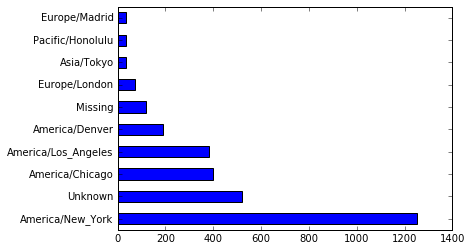

In [46]:
%matplotlib inline 
# Necessary to display the graphic in Jupyter Notebook

tz_count[:10].plot(kind = 'barh', rot = 0)

"""
kind : str
‘line’ : line plot (default)
‘bar’ : vertical bar plot
‘barh’ : horizontal bar plot
‘hist’ : histogram
‘box’ : boxplot
‘kde’ : Kernel Density Estimation plot
‘density’ : same as ‘kde’
‘area’ : area plot
‘pie’ : pie plot
‘scatter’ : scatter plot
‘hexbin’ : hexbin plot

rot : int, default None
Rotation for ticks (xticks for vertical, yticks for horizontal plots)
"""

### Parse a string 

In [50]:
frame["a"][:10] # Long string with too much information

# Note: frame["column name"] because I named the dataframe "frame" (yeah...)

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7    Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8    Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [54]:
results = Series([x.split()[0] for x in frame.a.dropna()])

# Series is a one-dimensional labeled array capable of holding any data type 
# (integers, strings, floating point numbers, Python objects, etc.)

In [73]:
# Why .split()[0]? Because want first substring 
# Details:

strg = frame["a"][:1] # first row
print ("Result 1:"), print(strg)
print('')

strg = strg[0] # content of the dataframe (to be able to pass a string in the function below)
print ("Result 2:"), print(strg.split())
print('')

print ("Result 3:"), print(strg.split()[0])


Result 1:
0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

Result 2:
['Mozilla/5.0', '(Windows', 'NT', '6.1;', 'WOW64)', 'AppleWebKit/535.11', '(KHTML,', 'like', 'Gecko)', 'Chrome/17.0.963.78', 'Safari/535.11']

Result 3:
Mozilla/5.0


(None, None)

In [74]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

### Decompose Top Time Zones by Windows vs. Non- Windows Users

In [87]:
import numpy as np

# Exclude missing agents ("agents" = "a")
cframe = frame[frame.a.notnull()] 

# Si contient le mot "Windows" dans la colonne "a(gent)", attribut lui "Windows" comme OS
operating_system = np.where(cframe['a'].str.contains("Windows"), "Windows", "Not Windows") 

operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='<U11')